In [1]:
import torch
import torchaudio as ta
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('Solarize_Light2')
%matplotlib widget

In [3]:
def to_complex(sig):
    """
    Adds an extra dimension to use with Pytorch FFT which
    requires a complex input
    """
    s = torch.zeros(sig.shape[0], sig.shape[1], 2)
    s[:,:,0] = sig
    return s

In [4]:
sig, sr = ta.load('../lecture_03_exercises/signals/speech2@24kHz.wav')
ir, irsr = ta.load('../lecture_03_exercises/irs/church_0.wav')

In [5]:
sig.shape, ir.shape

(torch.Size([1, 58388]), torch.Size([2, 131072]))

In [6]:
rs = ta.transforms.Resample(orig_freq=24000,new_freq=48000)

In [7]:
sig = rs(sig)

In [9]:
def torch_conv(sig, ir):
    conv_size = sig.shape[1]+ir.shape[1] - 1
    t1 = torch.zeros(1, conv_size, 2)
    t2 = torch.zeros(1, conv_size, 2)
    t1[:,:sig.shape[1],0] = sig
    t2[:,:ir.shape[1],0] = ir
    
    return torch.ifft(t1.fft(1)*t2.fft(1), 1)

In [10]:
ir.shape[1]

131072

In [11]:
conved = torch_conv(sig, ir[1,:].unsqueeze(0))

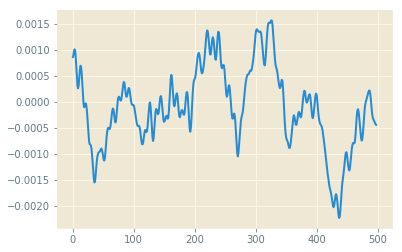

In [12]:
plt.plot(conved[0,:500,0].numpy())

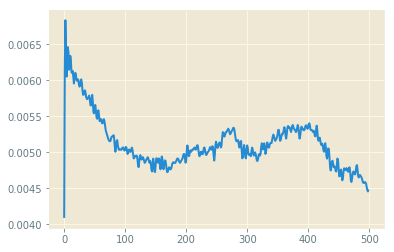

In [13]:
plt.plot(sig[0,:500].numpy())